In [1]:
import random
random.seed(0)
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from factor_analyzer import FactorAnalyzer
from matplotlib import pyplot as plt
import pingouin as pg

In [2]:
df = pd.read_csv('Book1.csv')
df.head(3)
factors = df[['p1','p2','p3','p4','p5','s1','s2','s3','s4','s5','c1','c2','c3','c4','c5','e1','e2','e3','e4','e5']]

In [3]:
oe = OrdinalEncoder(
    categories=[['1', '2', '3', '4', '5']]
)

for col in factors:
    oe.fit_transform(df[[col]])

In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chisquare, p_value = calculate_bartlett_sphericity(factors)
frame = {
    'Chi square':[chisquare],
    'p':[p_value]
}

bartletts_dataframe = pd.DataFrame(frame, columns=['Chi square', 'p'], index=['Bartletts test'])
bartletts_dataframe.to_csv('bartletts.csv')
bartletts_dataframe

,Chi square,p
Bartletts test,4323.148805,0.0


In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(factors)
kmo_values = pd.DataFrame(kmo_all, columns=['KMO'], index=[factors.columns])
kmo_values.to_csv('kmo.csv')
kmo_values, kmo_model

(         KMO
 p1  0.922849
 p2  0.917207
 p3  0.888054
 p4  0.865025
 p5  0.896004
 s1  0.906608
 s2  0.870745
 s3  0.841894
 s4  0.900143
 s5  0.825217
 c1  0.922133
 c2  0.901992
 c3  0.925461
 c4  0.913205
 c5  0.915893
 e1  0.920624
 e2  0.892417
 e3  0.917031
 e4  0.899028
 e5  0.888578,
 0.900422062591626)

<Figure size 648x360 with 0 Axes>

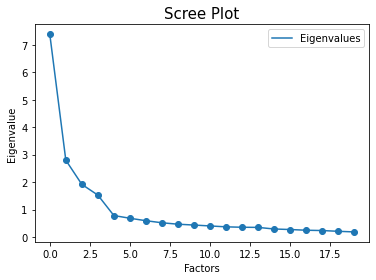

In [6]:
fa = FactorAnalyzer()
fa.fit(factors)
ev, v = fa.get_eigenvalues()
eigen_values_df = pd.DataFrame(ev, columns=['Eigenvalues'])
eigen_values_df.to_csv('Eigenvalues.csv')

plt.figure(figsize=(9, 5))
eigen_values_df.plot()
plt.scatter([i for i in range(len(eigen_values_df))], eigen_values_df)
plt.title('Scree Plot', size=15)
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [7]:
fa = FactorAnalyzer(n_factors=4, method='minres',rotation='oblimin')
fa.fit(factors)

FactorAnalyzer(n_factors=4, rotation='oblimin', rotation_kwargs={})

In [8]:
factor_loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index=[factors.columns])
factor_loadings['Uniquenesses'] = fa.get_uniquenesses()
factor_loadings['Communality'] = fa.get_communalities()
factor_loadings.to_csv('loadings.csv')
factor_loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Uniquenesses,Communality
p1,-0.105543,0.141635,0.606951,-0.015797,0.600161,0.399839
p2,-0.048244,0.147874,0.524042,0.151258,0.678306,0.321694
p3,0.038505,0.088047,0.694484,-0.050364,0.505920,0.494080
p4,0.077793,-0.104214,0.866716,0.050859,0.229304,0.770696
p5,-0.054261,0.054397,0.735219,-0.026568,0.452845,0.547155
s1,0.246765,0.005734,0.141074,0.490304,0.678774,0.321226
s2,-0.069522,0.149001,-0.025774,0.690302,0.495784,0.504216
s3,0.034305,-0.012013,-0.009534,0.792981,0.369770,0.630230
s4,0.152001,-0.003513,0.044657,0.672500,0.522632,0.477368
s5,-0.237226,-0.025667,0.097765,0.543058,0.638595,0.361405


In [9]:
p = factors[['p1', 'p2', 'p3', 'p4', 'p5']]
s = factors[['s1', 's2', 's3', 's4', 's5']]
c = factors[['c1', 'c2', 'c3', 'c4', 'c5']]
e = factors[['e1', 'e2', 'e3', 'e4', 'e5']]

cronbach_p = pg.cronbach_alpha(data=p)
cronbach_s = pg.cronbach_alpha(data=s)
cronbach_c = pg.cronbach_alpha(data=c)
cronbach_e = pg.cronbach_alpha(data=e)

values = [
    cronbach_p[0],
    cronbach_s[0],
    cronbach_c[0],
    cronbach_e[0],
]

cronbach_all = pd.DataFrame(values, columns=['Cronbach alpha'], index=['Personal factor', 'Social factor', 'Course factor', 'Economic factor'])
cronbach_all.to_csv('Cronbach.csv')
cronbach_all

,Cronbach alpha
Personal factor,0.845497
Social factor,0.801688
Course factor,0.909974
Economic factor,0.915486


In [10]:
def compute_cronbach_if_one_item_removed(dataframe):
    values = []
    new_df = dataframe.copy()
    for col in new_df:
        one_item_removed = dataframe.drop([col], axis=1)
        result = pg.cronbach_alpha(data=one_item_removed)
        values.append(result[0])
        new_df = dataframe.copy()
    return values

def compute_the_cronbach_and_save_df(dataframe, title):
    details = {
        title: compute_cronbach_if_one_item_removed(dataframe)
    }
    results = pd.DataFrame(details, index=dataframe.columns)
    results.to_csv(f'{title} if item removed.csv')

In [11]:
compute_the_cronbach_and_save_df(p, "Personal factor")
compute_the_cronbach_and_save_df(c, "Course factor")
compute_the_cronbach_and_save_df(e, "Economic factor")
compute_the_cronbach_and_save_df(s, "Social factor")

In [12]:
factor_summary = pd.DataFrame(fa.get_factor_variance(), columns=['Factor 1','Factor 2','Factor 3','Factor 4'], index=['SS Loadings','Proportion Var','Cumulative Var'])
factor_summary.to_csv('factor_variance.csv')
factor_summary

,Factor 1,Factor 2,Factor 3,Factor 4
SS Loadings,3.524311,3.271475,2.472013,2.157930
Proportion Var,0.176216,0.163574,0.123601,0.107896
Cumulative Var,0.176216,0.339789,0.463390,0.571286


In [13]:
factor_score = pd.DataFrame(fa.transform(factors), columns=['Economic factor', 'Course factor', 'Personal factor', 'Social factor'])
factor_score.to_csv("Factors.csv", index=False)